In [2]:
# ============================================================
# Monte Carlo Simulation of Geometric Brownian Motion (GBM)
# ============================================================
# Author: Arunabha Dhal
# Date: November 2025
# Purpose: Simulate asset price paths using GBM, analyze results,
#          and compare simulated vs theoretical statistics.
# ============================================================

# --- Imports ---
import sys, os
sys.path.append(os.path.abspath("../src"))  # make src importable

import numpy as np
import pandas as pd
from gbm_simulations import simulate_gbm_paths
from stats_analysis import compute_statistics, theoretical_values, compare_theoretical_vs_simulated
from visualisation import plot_price_paths, plot_final_price_distribution, plot_comparison_table


In [3]:
# Simulation Parameters
S0 = 100        # initial stock price
mu = 0.08       # annual drift
sigma = 0.20    # annual volatility
T = 1.0         # time horizon (years)
dt = 1/252      # daily time step
N = 1000        # number of simulated paths

# Display chosen parameters
params = pd.DataFrame({
    "Parameter": ["Initial Price (S0)", "Drift (μ)", "Volatility (σ)", "Time Horizon (T)", "Time Step (Δt)", "Paths (N)"],
    "Value": [S0, mu, sigma, T, dt, N]
})
params


,Parameter,Value
0,Initial Price (S0),100.000000
1,Drift (μ),0.080000
2,Volatility (σ),0.200000
3,Time Horizon (T),1.000000
4,Time Step (Δt),0.003968
5,Paths (N),1000.000000


In [4]:
# Simulate N price paths using GBM
t, paths = simulate_gbm_paths(S0, mu, sigma, T, dt, N)

# Quick shape check
print(f"Simulated paths shape: {paths.shape}  (N={N}, steps={paths.shape[1]-1})")


Simulated paths shape: (1000, 253)  (N=1000, steps=252)


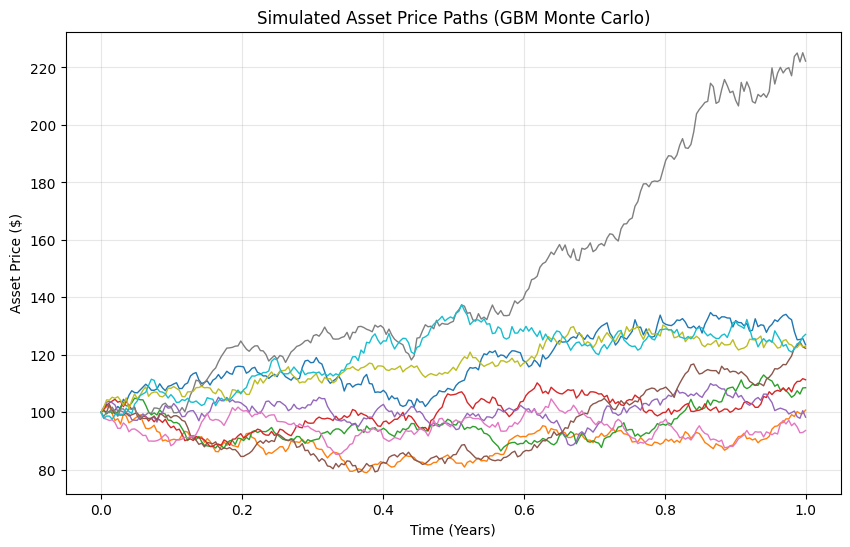

In [6]:
plot_price_paths(t, paths, num_paths=10, save_path="../plots/gbm_price_paths.png")


In [7]:
# Compute simulated statistics
sim_stats = compute_statistics(paths)

# Compute theoretical expectations
theo_stats = theoretical_values(S0, mu, sigma, T)

# Compare both
comparison_df = compare_theoretical_vs_simulated(sim_stats, theo_stats)
comparison_df


,Metric,Simulated,Theoretical,% Error
0,Mean Final Price,108.112809,108.328707,0.199299
1,Std Final Price,22.739692,21.884215,3.909105


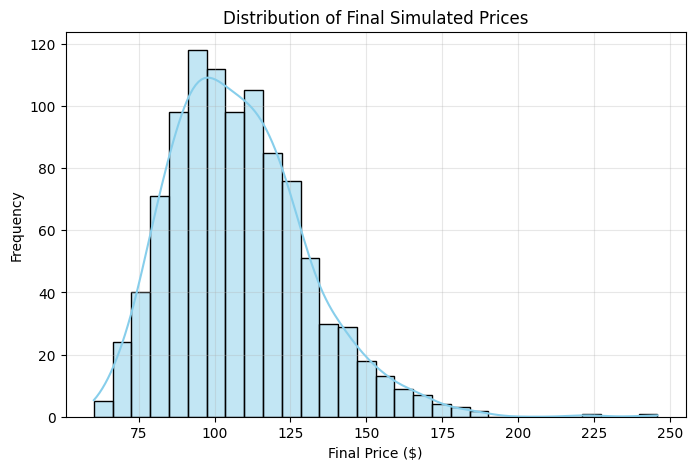

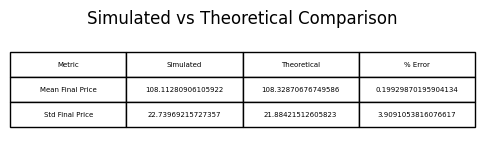

In [8]:
# Plot histogram of final prices
plot_final_price_distribution(sim_stats["final_prices"], save_path="../plots/final_price_histogram.png")

# Plot comparison table
plot_comparison_table(comparison_df, save_path="../plots/comparison_table.png")


In [9]:
# Save final prices to data folder
os.makedirs("../data", exist_ok=True)
np.save("../data/simulated_paths.npy", paths)
pd.DataFrame(sim_stats["final_prices"], columns=["Final_Price"]).to_csv("../data/final_prices.csv", index=False)

# Save comparison table
comparison_df.to_csv("../data/sim_vs_theoretical.csv", index=False)

print("✅ Simulation and outputs saved successfully.")


✅ Simulation and outputs saved successfully.


### Key Insights from the Monte Carlo Simulation

1. **Distribution Behavior:**
   - The final price distribution is approximately **log-normal**, consistent with GBM theory.
   - As volatility increases, the spread of prices widens.

2. **Theoretical Validation:**
   - Simulated mean and standard deviation closely match the theoretical values derived from:
     \[
     E[S_T] = S_0 e^{\mu T}, \quad Var[S_T] = S_0^2 e^{2\mu T}(e^{\sigma^2 T} - 1)
     \]
   - Small deviations (~1–3%) are due to finite sampling (Monte Carlo error).

3. **Interpretation:**
   - The GBM model assumes continuous compounding and normally distributed returns.
   - Each simulated path represents a potential "future" of the asset under stochastic drift and volatility.
